# Mini-Movielens EDA

Writer: E.W

Date: 2024/05/29

In [1]:
%load_ext lab_black

## Read Data

In [2]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv("ml-latest-small/ratings.csv")
movie_df = pd.read_csv("ml-latest-small/movies.csv")

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Check Missing Values

In [7]:
movie_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
rating_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Check Duplicates

In [9]:
movie_dp = movie_df.duplicated(keep=False, subset=["title"])
print(f"The num of duplicated rows is {movie_dp.sum()}")

The num of duplicated rows is 10


In [10]:
movie_dp_df = movie_df[movie_dp].sort_values(by="title")
movie_dp_df

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [11]:
rating_dp = rating_df.duplicated()
print(f"The num of duplicated rows is {rating_dp.sum()}")

The num of duplicated rows is 0


In [12]:
merged_df = movie_df.merge(
    rating_df, on="movieId", how="left", suffixes=("_left", "_right")
)
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [13]:
merged_df[merged_df["movieId"].isin(movie_dp_df["movieId"])].title.unique()

array(['Emma (1996)', 'Saturn 3 (1980)',
       'Confessions of a Dangerous Mind (2002)', 'Eros (2004)',
       'War of the Worlds (2005)'], dtype=object)

In [14]:
merged_df.movieId.replace(838, 26958, inplace=True)
merged_df.movieId.replace(6003, 144606, inplace=True)
merged_df.movieId.replace(32600, 147002, inplace=True)
merged_df.movieId.replace(2851, 168358, inplace=True)
merged_df.movieId.replace(34048, 64997, inplace=True)

In [15]:
merged_df[merged_df.movieId == 838]

,movieId,title,genres,userId,rating,timestamp


## Distribution

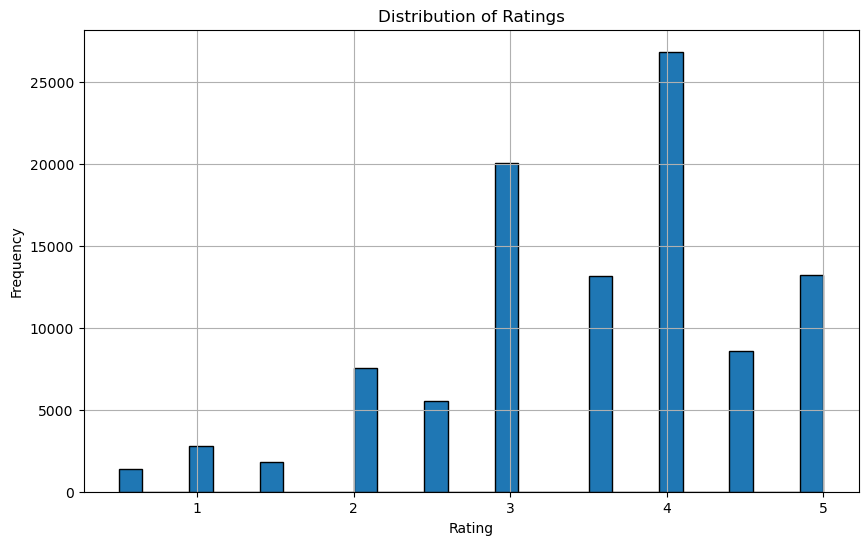

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged_df["rating"], bins=30, edgecolor="k")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

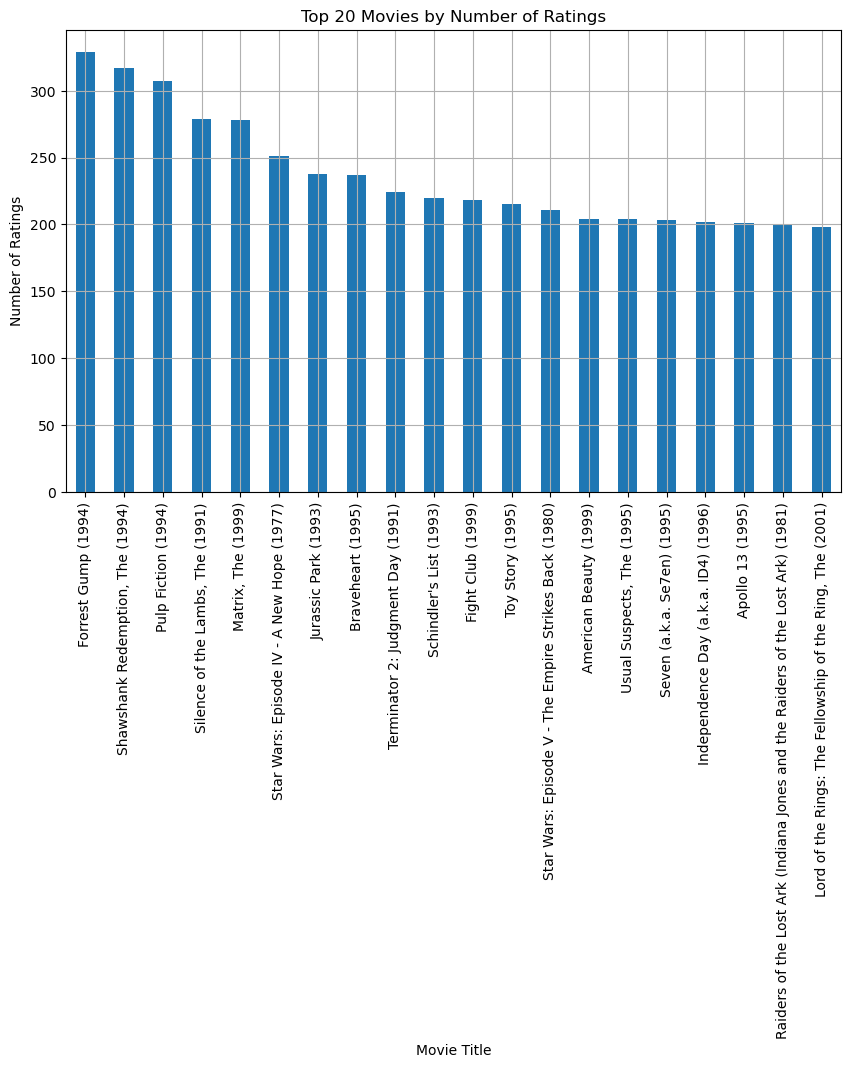

In [17]:
rating_counts = (
    merged_df.groupby("title")["rating"].count().sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
rating_counts.head(20).plot(kind="bar")
plt.title("Top 20 Movies by Number of Ratings")
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

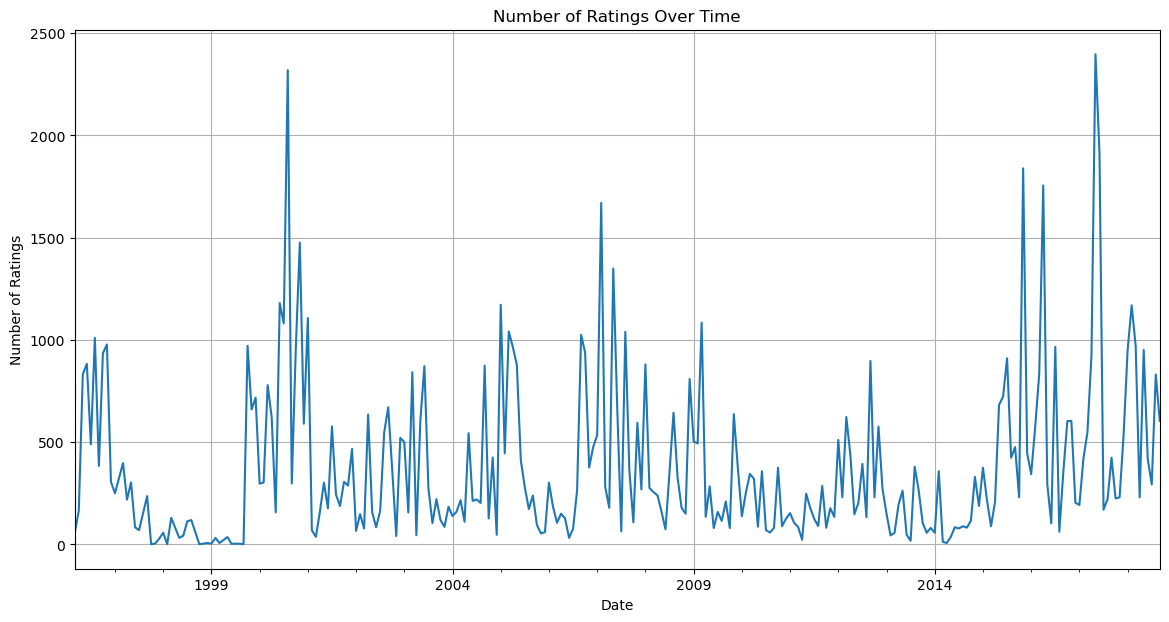

In [18]:
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"], unit="s")
merged_df["year_month"] = merged_df["timestamp"].dt.to_period("M")
monthly_ratings_count = merged_df.groupby("year_month")["rating"].count()
plt.figure(figsize=(14, 7))
monthly_ratings_count.plot()
plt.title("Number of Ratings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Ratings")
plt.grid(True)
plt.show()